W. Blake Cannon | wblakecannon@icloud.com | 12 Sept 2017

Kickstarter, the crowdfunding platform, is thinking about providing a consulting service to project founders to help its customers create more successful crowdfunding campaigns. You’ve been asked to do some initial analysis. 

In order to complete this assignment, please follow the link and download the following Kickstarter dataset: http://bit.ly/2cgMGDm. Use the dataset to complete this task.

##  Loading  and Inspecting the Kickstarter Data

In [251]:
# Set autosave to 3 minutes
%autosave 180
# ipython magic
%pylab inline
# Import modules
import os
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-paper')

Autosaving every 180 seconds
Populating the interactive namespace from numpy and matplotlib


In [61]:
# The following code reads all the Kickstarter data into Pandas DataFrames
# empty data will be filled in as NaN
# The data can be found at http://bit.ly/2cgMGDm
kickstarter_df = pd.read_csv('DSI_kickstarterscrape_dataset.csv', keep_default_na=True)
# Rename 'project id' to 'project_id' as spaces can confuse code
kickstarter_df.rename(columns={'project id': 'project_id'}, inplace=True)
# Set index as 'project_id'
kickstarter_df.set_index(['project_id'], inplace=True)

Read all the Kickstarter csv data into Pandas DataFrames. Empty data will be filled in as NaN. The data can be found at http://bit.ly/2cgMGDm

In [273]:
# Return shape and size to see how much data is being worked with
rows, columns = kickstarter_df.shape
print 'Rows:', rows
print 'Columns:', columns
print round(float(os.stat('DSI_kickstarterscrape_dataset.csv').st_size / 1000000.0), 2), 'MB'

Rows: 45957
Columns: 18
12.92 MB


The dataset is 45,957 rows long, 18 columns wide, and 12.9 MB. Not a very large dataset; but certainly  large enough to justify Python over Excel...

In [63]:
# Show counts and data types for all columns
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45957 entries, 39409 to 2147460119
Data columns (total 16 columns):
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(4), object(8)
memory usage: 6.0+ MB


In [64]:
# Find how many missing values and percentage missing in each column
print 'Missing data in each Kickstarter dataframe column:'
for c in kickstarter_df.columns:
    missing_data = len(kickstarter_df) - kickstarter_df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(kickstarter_df))) * 
                                                            100, 3)), '% of total'

Missing data in each Kickstarter dataframe column:
location : 1322 missing values is 2.877 % of total
pledged : 12 missing values is 0.026 % of total
reward levels : 59 missing values is 0.128 % of total


All columns have data except 'location' and 'reward levels'. But still very complete with very little missing values as percentage of whole.

In [65]:
# Inspect the data with .head
kickstarter_df.head(5)

,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
project_id,,,,,,,,,,,,,,,,
39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


The .head function gives us a preview of the data without having to load the entire dataset. It shows all the 'columns' of data for each project 'row'. 

In [57]:
# Get some quick and dirty statistics with pd.describe
kickstarter_df.describe()

,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


## Part 1: Foundational Data Analysis

###  1. What is the mean (total) pledge that projects get? (not per backer)

In [66]:
# Find mean of 'pledged' column
print "$", round(kickstarter_df.pledged.mean(), 2)

$ 4980.75


The mean (total) pledge that projects receive is $4980.75.

### 2. Create a historgram that shows the distribution for number of backers. What is the skew of the distribution?

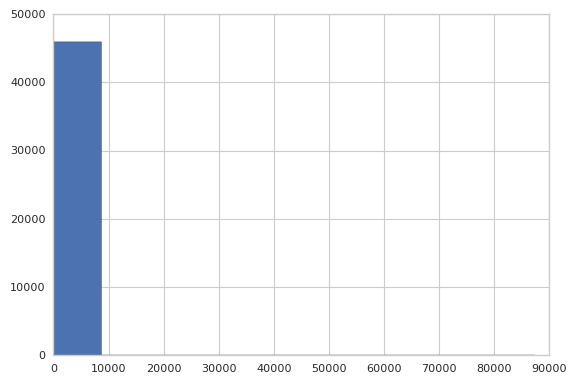

In [207]:
# Histogram of 'backers' column
plt.hist(kickstarter_df['backers'])
plt.show()

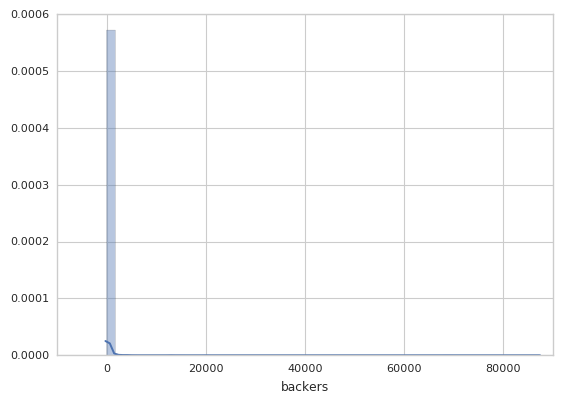

In [212]:
# Distribution plot of 'backers' column
sns.distplot(kickstarter_df['backers'])
plt.show()

The above plots are a histogram and a distribution plot of kickstarter backers. It's not very clear. There is **huge** number of projects that receive almost no backers.  This would indicate that distribution of kickstarter backers is strongly positive (right-skewed & left leaning). Let's look more into this.

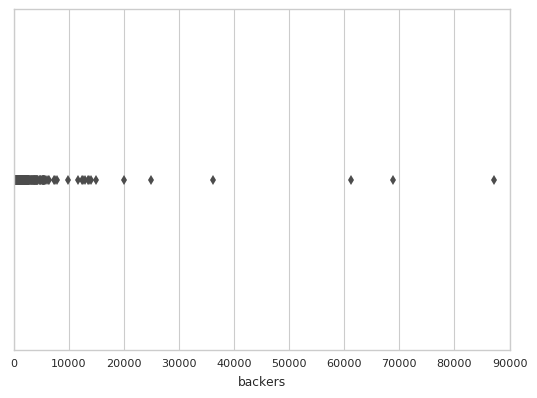

In [189]:
# Boxplot of'backers' column
sns.boxplot(x=kickstarter_df['backers'])
plt.show()

The boxplot above further proves this skewness. The box (quartiles) is almost not even visible. It appears as a black smudge to the far left of the chart. The extreme outliers are making this data extremely hard to see. Let's look at the numbers and see just how bad the skew is.

In [193]:
# Get quick and dirty starts for 'backers'
kickstarter_df['backers'].describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

The quick and dirty statistics summary shows some insight as to why.  Look at the quartiles. THe lower 25% is 5, the median is 23, the 75% is 59 and the max is a whopping 87142! A standard deviation of 688 show us that the uniform is far from uniform. Let's quickly clean up the outliers so we can see the distribution more clearly.

In [194]:
# Filter the original kickstarter dataframe to remove lots of outliers
filtered_df = kickstarter_df[((kickstarter_df.backers - kickstarter_df.backers.mean()) / kickstarter_df.backers.std()).abs() < .085]
filtered_df['backers'].describe()

count    24979.000000
mean        46.829016
std         29.133568
min         12.000000
25%         23.000000
50%         39.000000
75%         65.000000
max        128.000000
Name: backers, dtype: float64

The above summary statistics show that the data has been significantly filtered from statistical outliers. Let's check a box plot next.

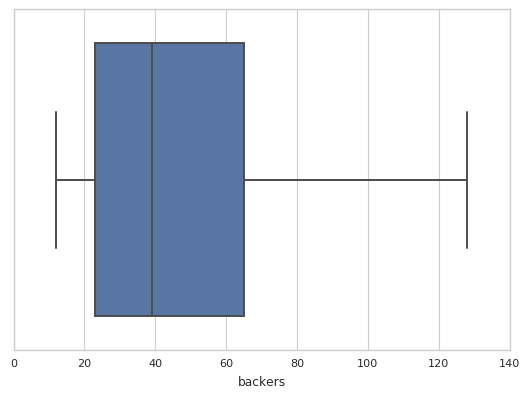

In [191]:
sns.boxplot(x=filtered_df['backers'])
plt.show()

The box plot above shows the extent of the filtering.

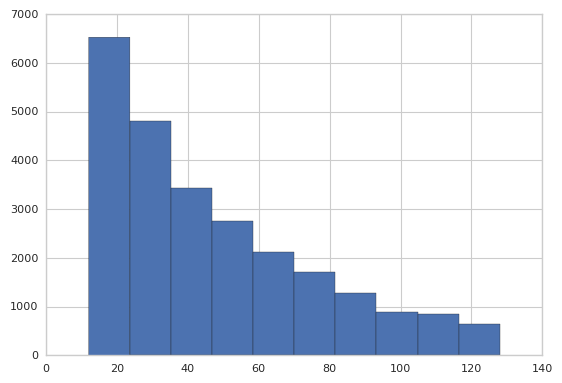

In [195]:
# Histogram of filtered 'backers' column
plt.hist(filtered_df['backers'])
plt.show()

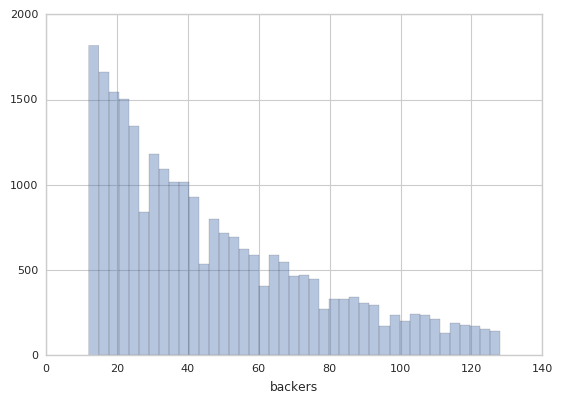

In [214]:
# distribution plot of filtered 'backers' column
sns.distplot(filtered_df['backers'], kde=False)
plt.show()

The histogram above now shows the strongly positive (right-skewed & left leaning) distribution in a way that's easier to understand.

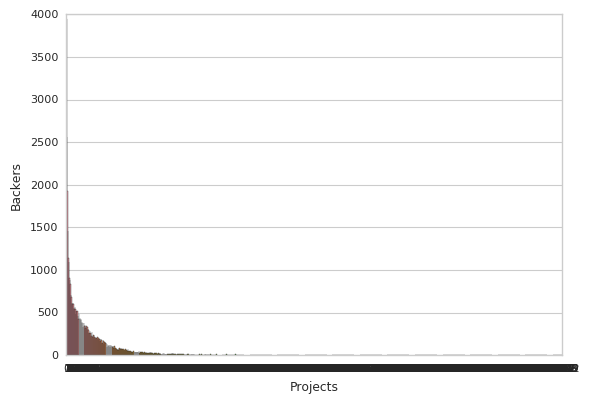

In [67]:
# Countplot
sns.countplot(x='backers', data=kickstarter_df)
plt.xlabel('Projects')
plt.ylabel('Backers')
plt.show()

Although not a histogram; the countplot above also shows that very few kickstarter projects get massive amount of backers while the vast majorty receive very little, if any, backers.

### 3a. Is the ‘duration’ variable normally distributed

In [234]:
# Describe 'duration' column
kickstarter_df['duration'].describe()

count    45957.000000
mean        39.995547
std         17.414458
min          1.000000
25%         30.000000
50%         32.000000
75%         48.390000
max         91.960000
Name: duration, dtype: float64

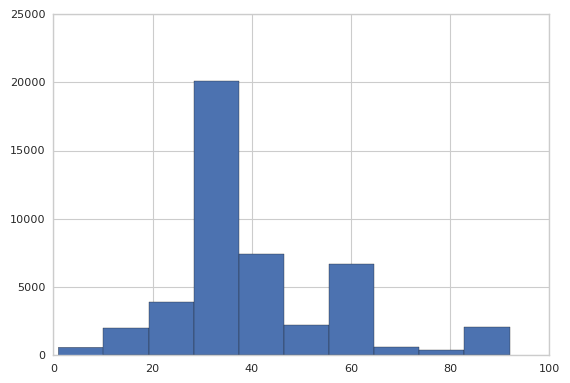

In [197]:
# Plot histogram of 'duration' column
plt.hist(kickstarter_df['duration'])
plt.show()

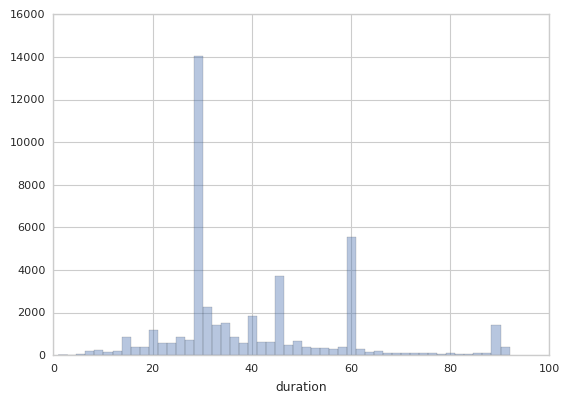

In [209]:
# Plot distribution plot of 'duration' column
sns.distplot(kickstarter_df['duration'], kde=False)
plt.show()

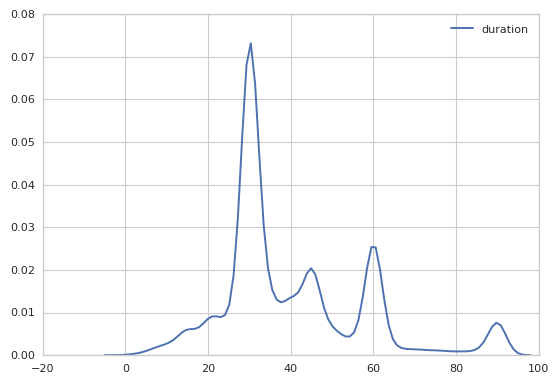

In [246]:
# Plot kde of 'duration' column
sns.kdeplot(kickstarter_df['duration'])
plt.show()

The 'duration' column in the dataset looks to be a bit normally distributed looking at it graphically.  Let's test it mathematically:

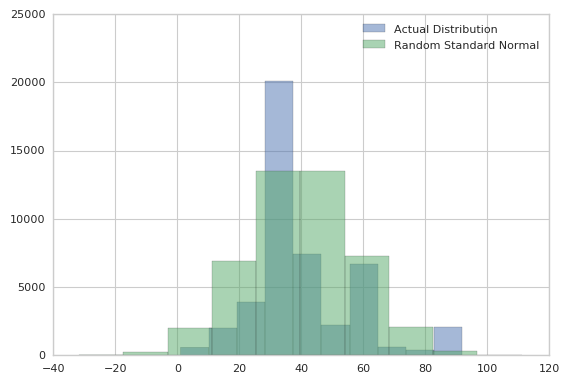

In [248]:
# Create normal distribution to overlay on top of actual distribution
duration_rand_normal = np.random.normal(loc=kickstarter_df['duration'].mean(), scale=kickstarter_df['duration'].std(), size=len(kickstarter_df['duration']))
# Overlay standard normal distribution over actual distribution
pyplot.hist(kickstarter_df['duration'], alpha=0.5, label='Actual Distribution')
pyplot.hist(duration_rand_normal, alpha=0.5, label='Random Standard Normal')
pyplot.legend(loc='upper right')
pyplot.show()

The above chart shows a Gaussian random numbers generated to create a standard normal distribution overlay (green) on top of the actual data (blue). This gives us another idea of how close the actual data is to being standard normal. It's still not conclusive, so let's test it mathematically:

In [247]:
# Convert 'duration' column to NumPy array
duration_test = np.array(kickstarter_df['duration'])
# k = z-score, p = p-value
k,p = stats.mstats.normaltest(duration_test)
# If statement to print results of p-test
if p < 0.05:
    print 'P-value =', p, '\nZ-score =', k, '\nDistribution is not normal.'
else:
    print 'P-value =', p, '\nZ-score =', k, '\nDistribution is normal'

P-value = 0.0 
Z-score = 6985.5754355 
Distribution is not normal.


### 3b. If you could collect data on another attribute of these projects, what would it be and why?

Although I have not done a very detailed analysis of the data, the one thing that catches my eye is a lack of some sort of way to distinguish which individual backers have contributed to each project. It would be interesting to see  what the distribution looks like of each backer to see how many projects they have backed. I imagine this information is in a separate database as it would be very combersome to try and present that information in this .csv. If that was in a separate database or csv some SQL joints could be used for analysis.

## Part 2:  Qualitative Analysis

Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

### Be sure to consider the following:

- What's the best length of time to run a campaign?
- What's the ideal pledge goal?
- What type of projects would be most successful at getting funded?
- Is there an ideal month/day/time to launch a campaign?